### imports

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import PolynomialFeatures

### Reading the data

In [2]:
def load_data(path: str, add_bias: bool = True) -> tuple:
    """
    Loading data and formatting for the latter linear regression

    Args:
        path: directory path of the csv file containing the data
        add_bias: if True x will be returned with 1 in the first column
    Returns:
        x: data features
        y: data labels
    """
    data1 = np.loadtxt(path, delimiter=',', unpack=True)
    x = np.array(data1[:-1]).T
    y = np.array(data1[-1:]).T
    if add_bias:
        x = np.insert(x, 0, 1, axis=1)
    return x, y

In [3]:
    path = r'C:\Users\student\Hafifa\ML_intro\ex2\data\ex2data1.txt'
    x1, y1 = load_data(path, add_bias = True) #TODO - change to sys.argv[1] and make it a CL argument

### Plotting the data 

In [4]:
def plot_data(x: np.array, y: np.array):
    """
    plots the input data with 2 markers for the different labels

    Args:
        x: input data
        y: data labels

    """
    x1 = x[:, 1]
    x2 = x[:, 2]
    plt.scatter(x1[y[:, 0] == 1], x2[y[:, 0] == 1], marker='+')
    plt.scatter(x1[y[:, 0] == 0], x2[y[:, 0] == 0], marker='3')
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend(["Admitted", "Not admitted"])

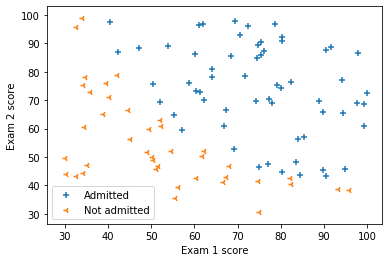

In [5]:
plot_data(x1,y1)


### implementing sigmoid function

In [6]:
def sigmoid(z: np.array) -> np.array:
    """
    Applies a sigmoid function over the input

    Args:
        z: input array. in the Logistic Regression context should be  theta.T @ x

    Returns:
        h: sigmoid function applied over z
    """
    h = 1 / (1 + np.exp(-z))
    return h

### computing the cost function

In [7]:
def h(theta: np.array, x: np.array) -> np.array:
    """
    computes the hypothesis function
    
    Args:
        x: input data
        theta: logistic regression's parameters
    Returns:
        h: sigmoid function applied over z=x@theta
    """
    h = sigmoid(x @ theta.T)
    return h

def cost_function(theta: np.array, x: np.array, y: np.array, llambda: float = 0.) -> float:
    """
    
    """
    m = len(y)
    hypo = h(theta,x)
    log_h = np.log(hypo)
    cost_term = (-y.T @ log_h - (1 - y).T @ (np.log(1-hypo))) # -y*log(h)-(1-y)log(1-h)
    reg_term = (llambda/2) * (theta[1:].T @ theta[1:]) # no need for theta[0]
    cost = (cost_term + reg_term) / m
    return cost.item()

### Logistic regression class

In [8]:
class LogisticRegression:

    def __init__(self, n_features: int, deg: int):
        """
        the constructor of the LogisticRegression object

        Args:
            n_features: number of features in the input data
        """
        self.poly = PolynomialFeatures(deg)
        self.theta = np.zeros((n_features, 1))

    def fit(self, x: np.array, y: np.array, max_iter: int = 400, llambda: float = 0., method: str = "Nelder-Mead") -> tuple:
        """

        Args:
            x:
            y:
            max_iter:
            llambda:
        Returns:
            res:
        """
        res = optimize.minimize(cost_function, x0=self.theta, args=(x, y, llambda), method=method,
                                options={"maxiter":max_iter, "disp":False})
        self.theta = np.array([res.x])
        return np.array([res.x]), res.fun
    
    def plot_decision_bounds(self, x: np.array, y: np.array, llambda: float = 0., linear: bool = True):
        """
        
        """
        boundary_x1 = np.array([np.min(x[:,1]), np.max(x[:,1])])
        boundary_x2 = np.array([np.min(x[:,2]), np.max(x[:,2])])
        x1_grid = np.arange(boundary_x1[0], boundary_x1[1], 0.1)
        x2_grid = np.arange(boundary_x2[0], boundary_x2[1], 0.1)
        z_vals = np.zeros((len(x1_grid),len(x2_grid)))
        
        for x1_ind,x1_val in enumerate(x1_grid):
            for x2_ind,x2_val in enumerate(x2_grid):
                sample = np.array([x1_val,x2_val]).reshape(1, -1)
                poly_features = self.poly.fit_transform(sample).reshape(1, -1)
                z_vals[x1_ind][x2_ind] = poly_features @ self.theta.T

        z_vals = z_vals.T
        cont = plt.contour(x1_grid, x2_grid, z_vals, [0])
        myfmt = { 0:'Lambda = %d'%llambda}
        plt.clabel(cont, inline=1, fontsize=15, fmt=myfmt)
        plt.title("Decision Boundary")
        plot_data(x,y)

        
    def predict(self, x: np.array) -> np.array:
        """
        return a prediction over the input data, as a class

        Args:
            x: input data

        Returns:
            hypo: hypothesis prediction of the data's class
        """
        hypo = h(self.theta, x)>=0.5
        return hypo
    
    def accuracy(self, x: np.array, y: np.array) -> float:
        """
        
        """
        pred = np.array(self.predict(x)) - y
        m = pred.shape[0]              
        acc = 1 - np.sum(np.abs(pred)) / m
        return acc

(100, 3)


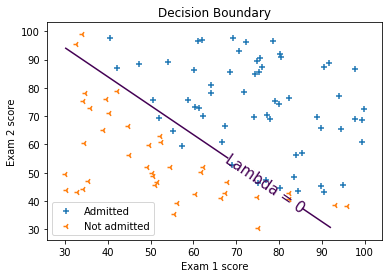

In [9]:
x1, y1 = load_data(path, add_bias = False)
poly = PolynomialFeatures(1)
x1 = poly.fit_transform(x1)
log_reg1 = LogisticRegression(x1.shape[1], deg=1)
log_reg1.fit(x1, y1, max_iter=400, llambda = 0.)
log_reg1.plot_decision_bounds(x1, y1)

### printing decision boundaries

### print classification accuracy

In [10]:
log_reg1.accuracy(x1, y1)

0.89

# regularized logistic regression

### loading data

In [11]:
path2 = r'C:\Users\student\Hafifa\ML_intro\ex2\data\ex2data2.txt'
x2, y2 = load_data(path2) #TODO - change to sys.argv[2] and make it a CL argument

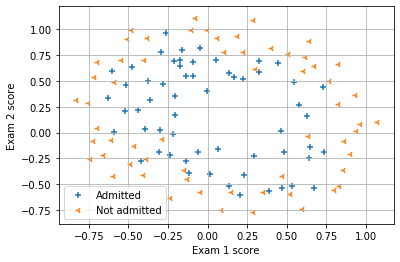

In [12]:
plt.grid()
plot_data(x2, y2)

###  

### feature- mapping

In [13]:
x2, y2 = load_data(path2, add_bias = False)
poly2 = PolynomialFeatures(6)
x2 = poly2.fit_transform(x2)

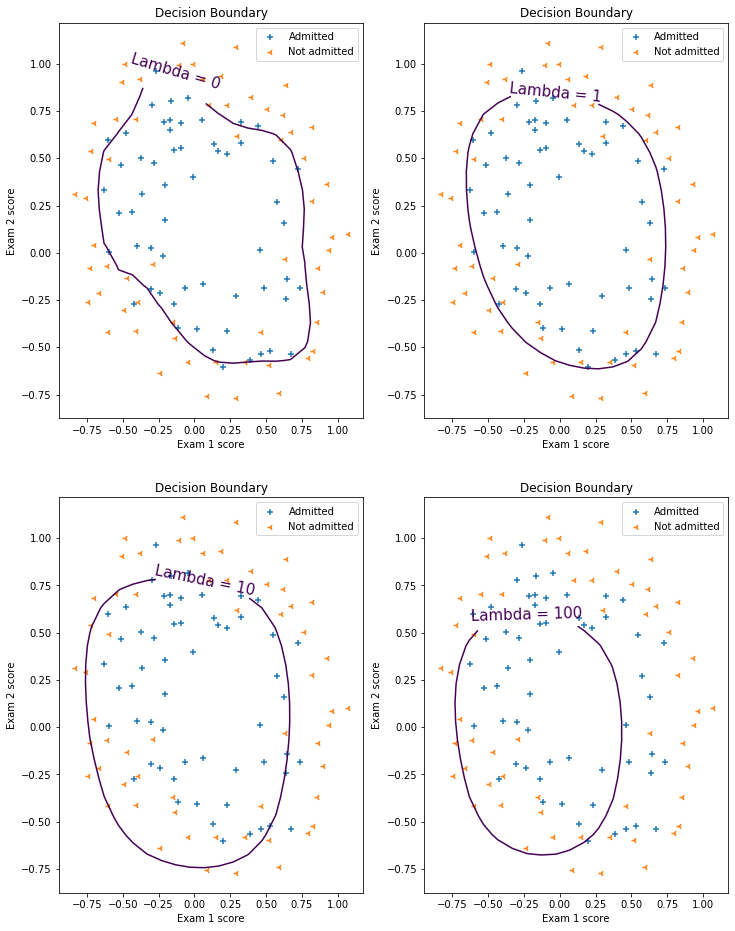

In [20]:
log_reg2 = LogisticRegression(x2.shape[1], deg=6)

plt.figure(figsize=(12,16))
# Lambda = 0
th0,_ = log_reg2.fit(x2, y2, max_iter=400, llambda = 0., method="BFGS")
plt.subplot(221)
log_reg2.plot_decision_bounds(x2, y2, llambda=0.)
# Lambda = 1
th1,_ = log_reg2.fit(x2, y2, max_iter=400, llambda = 1., method="BFGS")
plt.subplot(222)
log_reg2.plot_decision_bounds(x2, y2, llambda=1.)
# Lambda = 10
log_reg2.fit(x2, y2, max_iter=400, llambda = 10., method="BFGS")
plt.subplot(223)
log_reg2.plot_decision_bounds(x2, y2, llambda=10.)
# Lambda = 100.
th2,_ = log_reg2.fit(x2, y2, max_iter=400, llambda = 100., method="BFGS")
plt.subplot(224)
log_reg2.plot_decision_bounds(x2, y2, llambda=100.)